# Introduction
In this notebook we will cover the following topics:
- Trees, such as decision trees.
- Naïve bayes

# Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. A decision tree can learn to predict the target value by learning rules. Those rules are based on the given features. For instance, if you want to determine if someone has a sever risk of getting diabetes you could do the following: `if blood glucose level is high then YES, else NO`. The tree divides the features into smaller nodes.

Growing a tree involves making crucial decisions about selecting features and determining the conditions for splitting, while also understanding when to halt the growth. Since a tree tends to grow in an uncontrolled manner, pruning is essential to ensure its aesthetic appeal and efficiency.

one of the common techniques used here is 

### **Recursive Binary Splitting**:

During this procedure, all features are thoroughly examined, and various split points are experimented with by evaluating a cost function. The split that yields the optimal cost (or the lowest cost) is chosen as the final decision.

According to this procedure, during the first split (or at the root), all attributes/features are taken into consideration, and the training data is divided into groups based on this split. To determine the accuracy of each split, a function is utilized, evaluating the cost incurred by each. The split that results in the lowest cost is selected. This algorithm is recursive, allowing the groups formed to be further sub-divided using the same strategy. As a result of this approach, the algorithm is also referred to as the greedy algorithm, owing to its strong inclination to minimize costs. Consequently, the root node becomes the optimal predictor/classifier.

### **Homogenous Branches**:

Homogeneous branches refer to the situation in which the data points within a particular branch of a decision tree exhibit a high degree of similarity with respect to the target variable (class label in classification or continuous value in regression). In other words, a branch is considered homogeneous when the majority (or ideally, all) of the data points within that branch belong to the same class or have similar target values.

In the context of decision trees, creating homogeneous branches is a desirable goal because it simplifies the decision-making process. When a branch is highly homogeneous, it means that the majority of the data points in that branch share common characteristics or responses, making it easier to make predictions for new, unseen data points that fall into the same branch.

*Classification Example*:

Suppose we have a decision tree for classifying animals as "mammals" or "birds" based on features like whether they lay eggs, have fur, or produce milk. If a particular branch in the decision tree contains only animals that lay eggs and have feathers, it becomes a homogeneous branch, consisting exclusively of birds.

*Regression Example*:

Let's consider a decision tree for predicting the price of a house based on features like its size, number of rooms, and location. If a branch in the tree represents houses with similar sizes, similar numbers of rooms, and located in the same area, it becomes a homogeneous branch, meaning that the houses in that branch tend to have similar predicted prices.

Creating homogeneous branches is crucial because it ensures that the decision tree captures patterns and relationships within the data, leading to more accurate predictions. The goal of the tree-building algorithm is to find the best splits at each node such that it creates branches with high homogeneity, allowing for confident and reliable predictions for new data points that fall into those branches.

### **Cost of a split**:

Lets take a closer look at cost functions used for classification and regression. In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses. This makes sense we can be more sure that a test data input will follow a certain path.

Regarding regression, one of the functions that can be used is Sum of Squared Errors (SSE):

$$
SSE = \sum{(y - prediction)^2}\
$$

Consider a scenario where we aim to predict house prices using a decision tree. The decision tree initiates the splitting process by evaluating each feature in the training data. For a specific group, the mean of the target variable (house prices) for the training data inputs within that group is used as the prediction. The mentioned procedure is applied to all data points, and the cost is computed for each potential split. Subsequently, the split with the lowest cost is selected as the optimal decision, guiding the tree's growth. one can use other functions here such as cost function based on  standard deviation.

With respect to classification, one can use Gini Score:

$$
Gini = \sum{(pk . (1 - pk)}\
$$

The Gini score provides insight into the quality of a split by assessing the level of mixing among response classes within the resulting groups. In this context, pk​ represents the proportion of inputs belonging to the same class within a specific group. When a group contains inputs exclusively from a single class, achieving perfect class purity, pk is either 1 or 0, resulting in a Gini score of 0. Conversely, a node with an even split (50-50) of classes within a group exhibits the worst purity, resulting in pk=0.5 and G=0.5, particularly in the case of binary classification.

### **When to stop splitting?**:

The question of when to stop growing a decision tree is crucial to prevent overfitting, especially when dealing with a large set of features that can lead to an extensive number of splits and result in a complex, oversized tree. To address this issue, several stopping criteria can be employed.

1. **min_samples_leaf**: One common approach is to set a minimum number of training inputs to be included in each leaf node. For instance, we can stipulate that a minimum of 10 animals must be present in a leaf node for a decision to be reached, and any leaf with fewer than 10 animals is disregarded.

2. **max_depth**: Another method involves setting a maximum depth for the model. The maximum depth refers to the length of the longest path from the root to a leaf node. By limiting the depth, the tree's growth is controlled, preventing it from becoming overly intricate.

3. **min_samples_split**: Instead of setting a minimum number of samples per leaf, you can specify a minimum number of samples required to make a split at a node. If the number of samples at a node is less than this threshold, the node will not be split further.

4. **min_weight_fraction_leaf**:  It is similar to min_samples_leaf, but instead of considering the number of samples, it considers the sum of sample weights.

5. **min_impurity_decrease**: Specify a threshold for the minimum decrease in impurity (e.g., Gini impurity or Information Gain) required to make a split. If the impurity decrease is below this threshold, the split is not considered.

6. **Maximum Features**: Limit the number of features that can be considered for each split. This is useful when dealing with high-dimensional datasets, as it restricts the search space for potential splits.

7. **Pruning**: Build the full tree first and then prune the tree by removing branches that do not significantly improve performance on a validation set. Pruning helps to simplify the tree and avoid overfitting. Pruning in decision trees can be initiated from either the root or the leaves. One straightforward pruning approach commences at the leaves and removes each node containing the most frequent class, as long as this removal does not adversely affect the accuracy of the model. This method is commonly referred to as reduced error pruning. On the other hand, more advanced pruning techniques can be employed, such as cost complexity pruning, which leverages a learning parameter (alpha) to determine whether nodes can be pruned based on the size of the sub-tree. This technique is also known as weakest link pruning.

8. **Ensemble Techniques**: A group of techniques utilize more than one desicion trees to build a model that can reduce the effect of overfitting and increase the accuracy and generality of the model. Some of the most popular techniques in this category are Random Forest and Gradient Boosting.

Applying appropriate stopping criteria ensures that the decision tree achieves a balance between complexity and generalization, enhancing its ability to make accurate predictions on new, unseen data.

### **Class Imbalance**

Balancing the dataset in the context of decision tree learning means adjusting the class distribution of the training data to reduce the impact of class imbalances. Class imbalances occur when some classes are significantly more prevalent than others in the dataset, leading the decision tree learner to favor the dominant classes and potentially neglecting the minority classes.

1. **Resampling Techniques**: a. Oversampling: Increase the number of instances in the minority class by duplicating existing data points or generating synthetic samples. b. Undersampling: Decrease the number of instances in the majority class by randomly removing data points from the majority class.

2. **Synthetic Data Generation**: Techniques like Synthetic Minority Over-sampling Technique (SMOTE) create synthetic data points in the minority class, addressing the class imbalance.

3. **Class Weighting**: In decision tree algorithms, you can assign higher weights to the samples from the minority class during the training process. This allows the algorithm to pay more attention to the minority class during the learning phase.

4. **Ensemble Methods**: Ensemble methods like Random Forest and Gradient Boosting are naturally robust to class imbalances and can handle them more effectively than individual decision trees.

### **Advantages**:
- Simple to understand and to interpret. The tree can be visualized.
- Doesn't require much data preparation, regarding normalization, dummy variables etc.
- The cost of using the tree is logarithmic in the number of datapoints, thus it is rather quick.
- Possible to validate a model using tests.

### **Disadvantages**:
- Can create over-complex trees that do not generalize data well. Thus, overfitting is a big issue with trees, especially with high-dimensional data.
- Can be unstable, because small variations in data might result in completely different trees. That is why an `ensemble` is popular.
- Decision trees create biased trees if some classes dominate. Therefore, class-balancing is very important. This can be done using over- under-sampling and other techniques.

For classification, scikit-learn provides the `DecisionTreeClassifier`. This model can be used for:
- Binary classification
- Multi-class classification

The model can output:
- The actual prediction
- The probability of a prediction. There have been some issues whether it would really be the probability. Therefore, some calibration methods have been developed. However, this is too in-depth, but good to know that probability can be misleading.

To plot the decision tree function we can use the `plot_tree` function. This will give us insight into its decision rules. For an extensive tutorial, read the <a href="https://scikit-learn.org/stable/modules/tree.html#tree" target="_blank">user guide</a>.

For regression, scikit-learn provides the `DecisionTreeRegressor`.

### **Tips on practical use**:
- As decision trees tend to overfit with a large number of features, make sure to getting the right ratio of samples to features.
- Consider performing dimensionality reduction.
- Consider creating another model that doesn't overfit for feature selection purposes.
- Tune `max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease`.

For further information one can use the following links:

<a href="https://en.wikipedia.org/wiki/Decision_tree_learning" target="_blank">wiki</a>, <a href="https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052" target="_blank">link</a>, <a href="https://www.youtube.com/watch?v=_L39rN6gz7Y" target="_blank">Youtube</a>, <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">boosting</a> (not necessary for this assignment)


### **Boosting and Bagging (Desicion Trees)**:

#### **Bagging**:
The prediction accuracy of a decision tree can be low due to its vulnerability to variance. This indicates that if we randomly split the training data into two sets and construct decision trees for both parts, the outcomes might differ considerably. Ideally, we seek a result that exhibits low variance when applied repeatedly to various distinct datasets. In other words, we want a decision tree that demonstrates stability and consistent performance across different data samples. One of the techniques one can use to enhance the accuracy of a desicion tree is **Bootstrapping**. One of the bootsrapping technique is **Bagging** and its stages are as follows:

1. Create many (e.g. 100) random sub-samples of our dataset with replacement (meaning we can select the same value multiple times).

2. Learn(train) a decision tree on each sample.

3. Given new dataset, Calculate the prediction for each sub-sample.

4. Calculate the average of all of our collected predictions(also called bootstrap estimates) and use that as our estimated prediction for the data.

In this approach, trees are grown deep and are not pruned. Thus each individual tree has high variance, but low bias. Averaging these trees reduces the variance dramatically.

Bootstrapping is a robust statistical technique used to estimate a quantity from a data sample, such as a mean or a standard deviation. When applied to high-variance machine learning algorithms, like decision trees as demonstrated in the above example, it is referred to as Bagging (or bootstrap aggregating). Bagging involves creating multiple bootstrap samples (random subsets with replacement) from the original data and training separate decision trees on each sample. These trees are then combined through an averaging process (for regression tasks) or voting (for classification tasks), resulting in a more stable and accurate prediction model. Bagging helps mitigate the impact of high variance and improves the overall performance and generalization of the machine learning algorithm.

#### **Error Estimation**:
A convenient approach for estimating the test error of a bagged model, without resorting to cross-validation, is known as Out-of-Bag Error Estimation. During the bagging process, some observations remain unused to train specific trees, and these are referred to as the out-of-bag (OOB) observations. By leveraging these OOB observations, we can predict the response for each of them using the corresponding trees that did not involve them in their training. Subsequently, we can aggregate the predicted responses through averaging (for quantitative responses) or majority voting (for qualitative responses). This yields an overall OOB MSE (Mean Squared Error) or classification error rate.

The benefit of this OOB approach is that it provides an acceptable test error rate, as the predictions rely solely on the trees that were not trained using the specific observation in question. Hence, there is no need for cross-validation, making the process more efficient and less computationally demanding.

#### **Random Forests**:
When decision trees are constructed using bootstrapped samples (bagging) and utilize the strongest predictors/classifiers for splitting branches, it is likely that several trees will end up using the same strong predictor at various points in their structure.

This repetitiveness of strong predictors across multiple trees leads to correlated decisions among the ensemble. As a result, when the trees are combined to make predictions on new data points, they tend to produce similar outcomes. While this can enhance the accuracy of the model on the training data (reducing bias), it may lead to higher variance when applied to unseen data.

The variance here refers to the sensitivity of the model's predictions to the specific training data it was exposed to during the bootstrapping process. If the training data happened to capture some random fluctuations or noise, the correlated decisions made by multiple trees could amplify these fluctuations, resulting in less reliable predictions on new data. This is known as overfitting, where the model becomes too tailored to the training data and loses its ability to generalize well to unseen data.

To address this issue, ensemble techniques like Random Forests were introduced. Random Forests further randomize the feature selection process during tree building, which helps reduce the correlation between trees and, in turn, mitigates overfitting. This increased diversity in the ensemble tends to improve its generalization performance and reduces variance, resulting in a more robust and accurate model on unseen data.

The core idea of random forest is as follows. When splitting branches in a tree, a random sample of "m" predictors is selected as potential split candidates from the complete set of "p" predictors. However, only one predictor from the sampled set is used for the actual split at each node. This process is repeated at every split. Therefore, a new sample of "m" predictors is drawn for each split in the tree.

1. For classification a good default is: m = sqrt(p)

2. For regression a good default is: m = p/3

In genereal, tuning the value of "m" is an essential step in optimizing the Random Forest model. Different values of "m" can be tried and evaluated using cross-validation. Cross-validation helps determine the optimal value of "m" that leads to the best trade-off between bias and variance, resulting in a well-performing model on new and unseen data.

Thus, on average, (p — m) / p of the splits will not even consider the strong predictor. This is known as decorrelating the trees, as we fix the issue of each tree using same strong predictor. If m = p then random forests is equal to bagging.

#### **Feature Importance**:

One problem with computing fully grown trees is that we cannot easily interpret the results. And it is no longer clear which variables are important to the relationship. Calculating drop in the error function for a variable at each split point gives us an idea of feature importance. It means that we record the total amount that the error is decreased due to splits over a given predictor, averaged over all bagged trees. A large value then indicates an important predictor. In regression problems this may be the drop in residual sum of squares and in classification this might be the Gini score.

#### **Boosting**:
The prediction accuracy of decision trees can be further improved by using Boosting algorithms. The basic idea behind boosting is converting many weak learners to form a single strong learner. 

A weak learner is a classifier that consistently performs better than chance when attempting to label the data, regardless of the distribution in the training data. Outperforming chance indicates that the error rate is consistently lower than 1/2. Consequently, the learner algorithm is able to acquire some knowledge, but it lacks the ability to be highly accurate in learning the complex relationships between inputs and targets. In essence, a weak learner is not proficient in capturing intricate patterns on its own. Instead, it relies on ensembling methods or combination with other weak learners to become more powerful as a group rather than individually.

We start finding weak learners in the dataset by making some distributions and forming small decision trees from them. The size of the tree is tuned using number of splits it has. Often 1 works well, where each tree consists of a single split. Such trees are known as Decision Stumps.

Another parameter boosting takes is the number of iterations or number of trees in this case. Additionally, it assigns weights to the inputs based on whether they were correctly predicted/classified or not. Lets look at the algorithm.

First, the process begins by initializing the inputs with equal weights. The initial base learning algorithm employed is typically a decision stump, constituting a weak learner. In this initial stage, the algorithm fits a subsample of the data and makes predictions for the entire dataset.

Next, the iterative process is carried out until the maximum number of trees is reached:

The algorithm updates the weights of the inputs based on the previous run, assigning higher weights to inputs that were wrongly predicted or classified.

Another decision stump is then constructed, taking into account the misclassified inputs (those with higher weights), and it is fitted to a subsample of the data.

Finally, all inputs are predicted or classified using this newly formed decision stump.

After completing these iterations, the weak rules obtained are combined to create a single strong rule. This composite rule will be utilized as the final model for prediction and classification tasks. The combination of multiple weak learners contributes to the creation of a more powerful and accurate overall model.

In the regression setting, the boosting technique adjusts the weights of inputs based on the prediction error, typically calculated using least squares. This adjustment leads the subsequent learners to focus more on inputs that have a larger prediction error.

This particular boosting approach is known as Adaptive Boosting or AdaBoost. Similar to decision trees, the boosting approach also aims to minimize a loss function. In the case of AdaBoost, the exponential loss function is utilized to guide the learning process.

Another popular version of boosting is the Gradient Boosting Algorithm. While the basic concept remains consistent with traditional boosting, there is a fundamental difference in the approach. Instead of adjusting weights, the model is fit on the residuals, which represent the differences between the predictions and the original outcomes.

In Adaboost, the learning process involves iteratively refining sample weights to focus on misclassified inputs. On the other hand, Gradient Boosting utilizes an internal regression model that is trained iteratively on the residuals. This means that the new weak learners are formed with a specific emphasis on the inputs that exhibit high residuals, essentially concentrating on the areas where the previous model struggled to make accurate predictions.

Both algorithms, Boosting and Gradient Boosting, incorporate a tuning parameter known as lambda or shrinkage, which plays a critical role in slowing down the learning processes. This parameter enables the algorithms to employ more diverse and differently shaped trees to target the residuals effectively. Another name for this parameter is the learning rate, as it regulates the impact of each tree on the overall model.

Unlike traditional decision tree fitting, Boosting and Gradient Boosting refrain from bootstrapping. Instead, each tree is fitted on a modified version of the original data. In these approaches, the emphasis is placed on adjusting the weights of data points based on their performance in previous iterations. This allows subsequent trees to concentrate on the misclassified or high residual data points, leading to a more accurate model.

By avoiding the fitting of a single large decision tree, which can easily lead to overfitting and a rigid fit to the data, Boosting and Gradient Boosting take a more cautious approach. Instead, they employ an ensemble of weak learners that gradually learn and improve the model's performance, resulting in a more robust and reliable learning process.

There are a number of reasons that Desicion trees are the best choice for boosting based on the <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">link</a>:

1. Decision trees are non-linear. Boosting with linear models simply doesn’t work well.

2. The weak learner needs to be consistently better than random guessing. You don’t normally need to do any parameter tuning to a decision tree to get that behavior.

3. Decision trees are reasonably fast to train.

4. By changing the depth you have a simple and easy control over the bias/variance trade off, knowing that boosting can reduce bias but also significantly reduces variance.

The above information about Boosting and Bagging is just a summary and paraphrazed informaion of <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">link</a>. The reason is that I found the language of this web page tough to understand, consequently, I make it a little bit easier to realize.


**Main takeaway**:
- Every dataset has its own characteristic and different types of models have their own unique aspects that may work best with a given dataset.

# Example of understanding decision trees
In this example I add all the material that exist in the <a href="https://scikit-learn.org/stable/modules/tree.html#tree" target="_blank">user guide</a>.

In [304]:
# General Modules
import pandas as pd
import numpy as np
import graphviz
import time
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dataset module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles

# preprocessing modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Classification modules
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB


# Metrics modules
from sklearn.metrics import accuracy_score

# Model selection modules
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)


DecisionTreeClassifier()

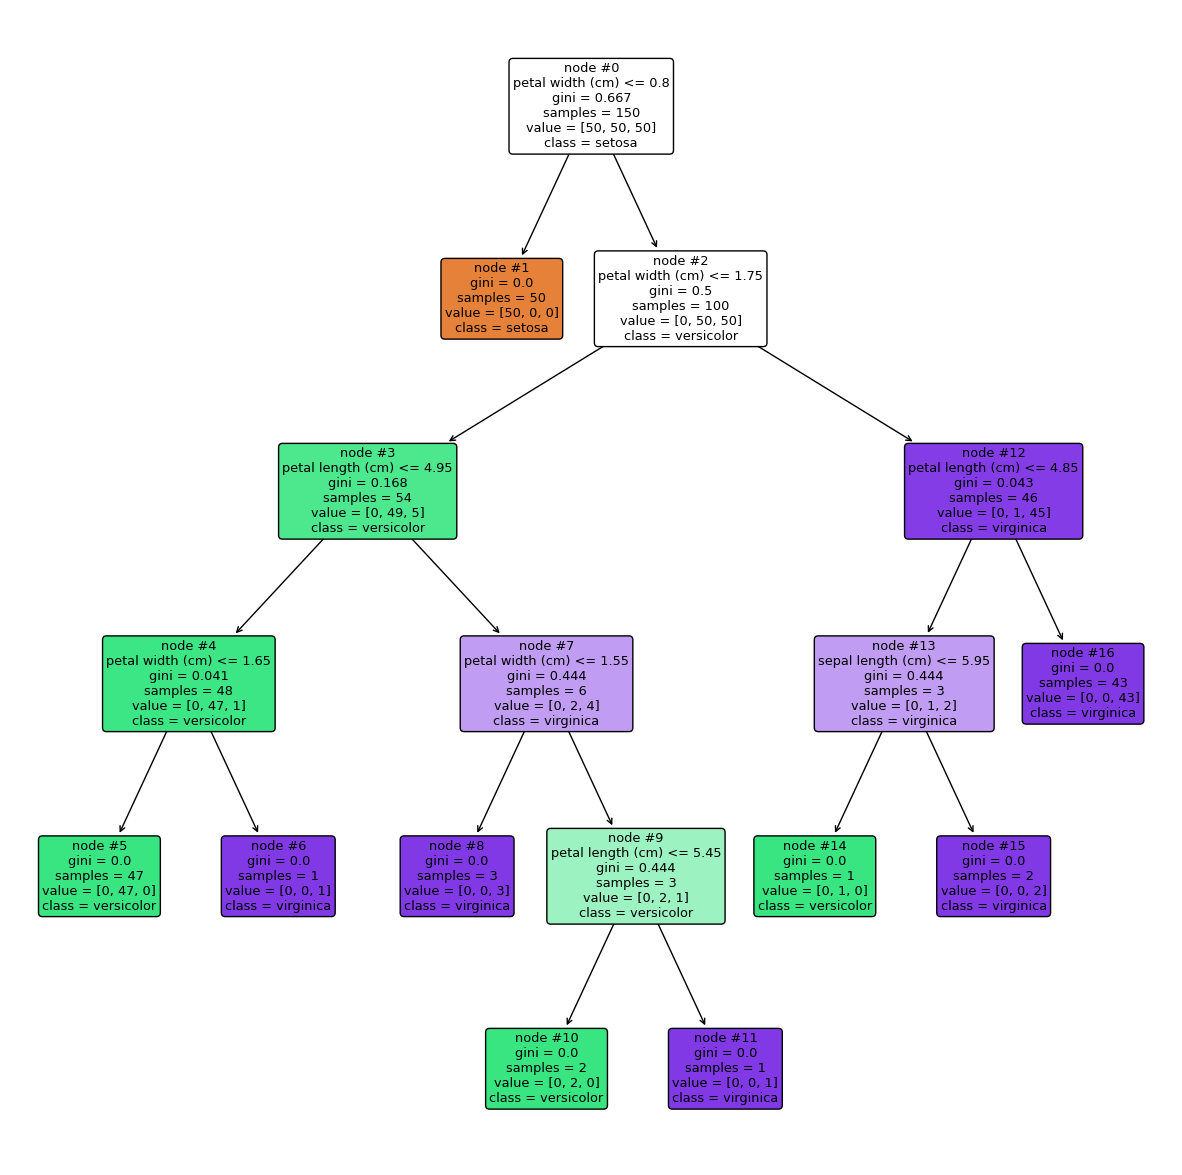

In [3]:
def tree_plotter(dt, features, classes, fig_size=(15, 15)):
    plt.figure(figsize=fig_size)
    tree.plot_tree(
        dt,
        feature_names=features,
        class_names=classes,
        filled=True,
        rounded=True,
        node_ids=True
    )
    plt.show()


tree_plotter(dt, iris.feature_names, iris.target_names)


Also, I use graphviz package to plot this tree. it is a little bit tricky to work with graphviz, but it worth it. Be sure to install graphviz both on Python and your windows, then add the path  C:\Program Files\Graphviz\bin to your system's path if you are using Window of course. For more information please have a look at the following <a href="https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft" target="_blank">link</a>. on this Stackflow link you can find different instructions for different operator systems to install and use graphviz on your computer.

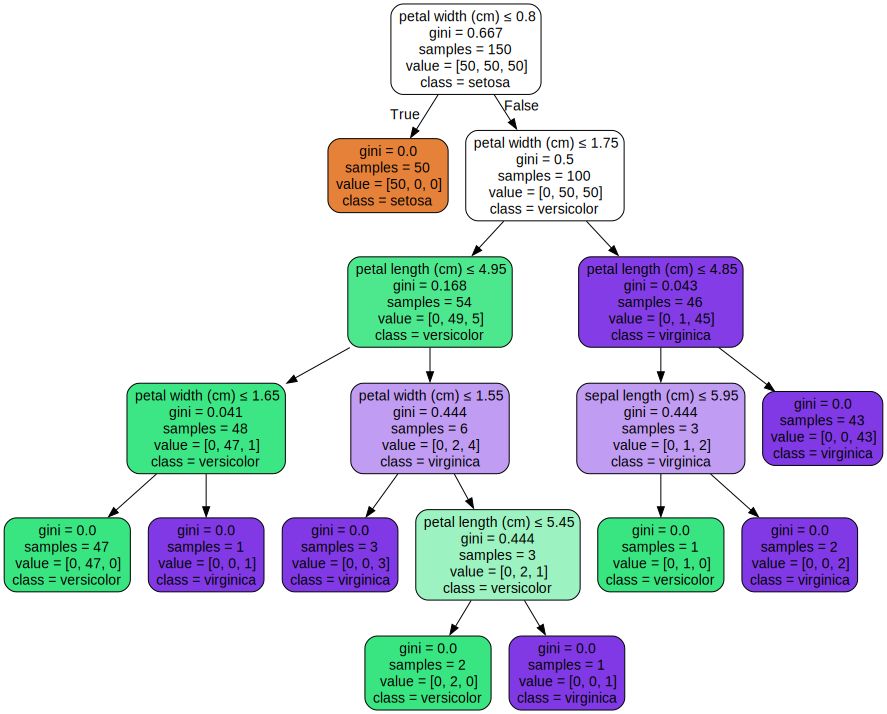

In [4]:

dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


First and foremost, the decision tree analysis reveals that petal length emerges as the most influential classifier. Not only does it serve as the root of the decision tree, but it also appears twice in this concise tree. Petal width, though not the root, also holds significance as it is repeated twice in the tree. The results indicate that petal length alone is sufficient to distinguish the Setosa species from the others. Flowers with a petal length (cm) ≤ 2.45 are predominantly identified as Setosa.

However, distinguishing between the other two species, Virginica and Versicolor, requires additional branches and classifiers due to the overlap in some of their features. This intersection poses a challenge for a clear separation. For instance, among the flowers with a petal length greater than 2.45, the majority belong to Versicolor if their petal width is smaller than 1.75 (approximately 91%). However, classifying the remaining 9% as Virginica demands two to three extra classifiers, signifying the substantial intersection between these two species in this specific range.

On the other hand, when the petal width exceeds 1.75, almost all the flowers (about 98%) are categorized as Virginica, requiring just one or two branches to differentiate among the species. It is essential to note that after the third layer of the decision tree, the remaining sample size reduces to three, which can introduce potential inaccuracies when predicting new flowers with features falling within this category. Overfitting could be a concern in such cases.

To address this issue, tuning the parameters associated with decision trees can be beneficial. Although decision trees are considered non-parametric models, certain parameters, as mentioned above, can be adjusted to reduce model variance and improve accuracy. By optimizing these parameters, the model's generalization capability can be enhanced, mitigating the risk of overfitting and improving the overall predictive performance.

 Also, one can plot the decision surface of a decision tree trained on pairs of features of the iris dataset. <a href="https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html" target="_blank">link</a>

C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_7772\1567297131.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_7772\1567297131.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_7772\1567297131.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_7772\1567297131.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_7772\1567297131.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_n

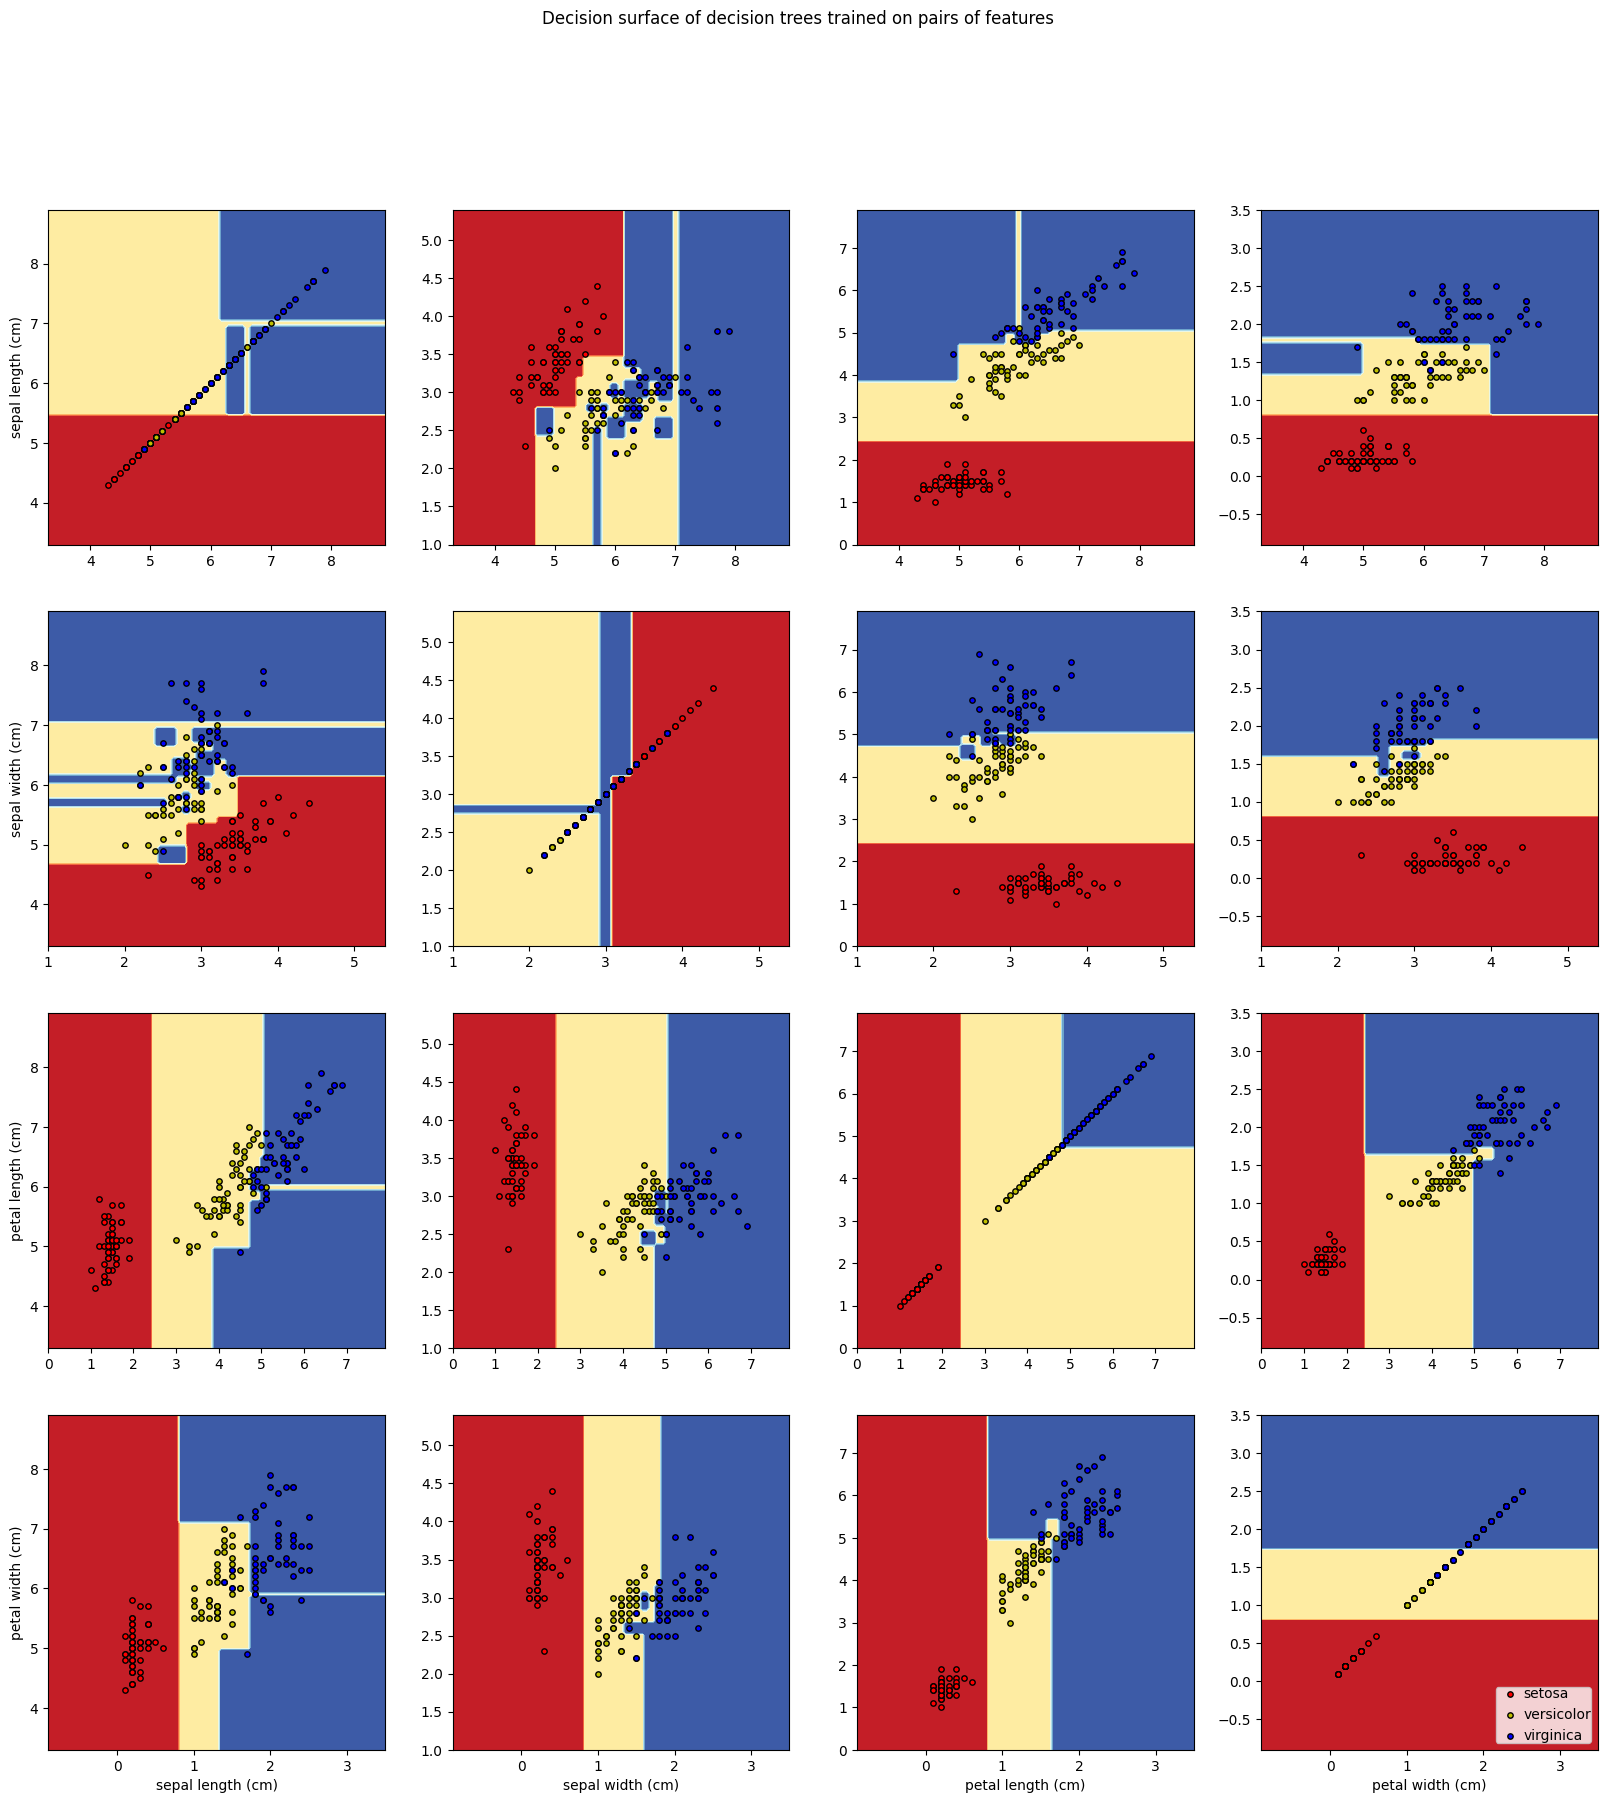

In [5]:
def decision_surface_plot(data, num_classes, colors, xlabel, ylabel, scatter_label):
    n_classes = num_classes
    plot_colors = colors

    # Sketch the plot
    fig, axes = plt.subplots(data.shape[1], data.shape[1], figsize=(20, 20))

    # Flatten the axes
    if data.shape[1] > 1:
        # flatten for easier manipulation
        axes.flatten()
    else:
        axes = [axes]

    # loop over all the features/classifiers
    for number in range(data.shape[1]**2):
        row_num = number // 4
        column_num = number % 4

        X = iris.data[:, [row_num, column_num]]
        y = iris.target

        # Train
        clf = tree.DecisionTreeClassifier().fit(X, y)

        # Plot the decision boundary
        decision_boundary_plot = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            cmap=plt.cm.RdYlBu,
            response_method="predict",
            ax=axes[row_num, column_num],
        )

        # sketch the labels
        if column_num == 0:
            axes[row_num, column_num].set_ylabel(ylabel[row_num])

        if row_num >= data.shape[1]-1:
            axes[row_num, column_num].set_xlabel(xlabel[column_num])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            axes[row_num, column_num].scatter(
                X[idx, 0],
                X[idx, 1],
                c=color,
                label=scatter_label[i],
                cmap=plt.cm.RdYlBu,
                edgecolor="black",
                s=15,
            )

    # add title and legend
    plt.suptitle(
        "Decision surface of decision trees trained on pairs of features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()


data = iris.data
num_classes = 3
colors = 'ryb'
xlabel = iris.feature_names
ylabel = iris.feature_names
scatter_label = iris.target_names
decision_surface_plot(data, num_classes, colors, xlabel, ylabel, scatter_label)


This plot illustrates the decision surface of decision trees trained on various pairs of features. The diagonal plots display each feature (classifier) against itself, providing insights into their individual power to separate categories. Based on the displayed plots, it is evident that petal length performs better than other features in distinguishing between the species.

Furthermore, the comparison of decision surfaces generated from different pairs of classifiers reveals that the combination of petal length and petal width is particularly effective in separating the species. However, most combinations involving other classifiers fail to separate all surfaces distinctly. For instance, the combination of sepal length and sepal width results in an area that is a mixture of Versicolor and Virginica species.

These observations align with the findings from the decision tree displayed above. As a result, this plot serves as a valuable tool to compare the impact of different classifiers on the dataset and their corresponding decision surfaces. It provides a deeper understanding of how each feature influences the model's performance and assists in identifying the most discriminative features for accurate species classification. 

The next part of this part can be tuning the parameters of a decision tree involves finding the optimal values for the parameters that best suit the data and improve the model's performance. One of the ways that one can use to extract the best performance is grid searching in combination with Cross-validation technique. I made a function for this purpose in Fifth Assignment 'E_LR_SVM.ipynb' notebook.

When dealing with multi-class classification problems, choosing the appropriate scoring method is slightly different from binary classification. While most scoring methods can be used for multi-class problems, the 'average' parameter plays a significant role in metrics like precision, recall, and F1 score when dealing with multiple classes.

The 'average' parameter determines how the metric should be computed in the multi-class context. It offers four options:

1. 'None': This is the default option, where the scoring function does not aggregate the scores of individual classes, providing an array of scores for each class separately. This option is mostly used in binary classification.

2. 'micro': Micro-averaging calculates the aggregate score globally by considering all classes together. It gives more weight to larger classes and is suitable for imbalanced class distributions.

3. 'macro': Macro-averaging calculates the score separately for each class and then takes the unweighted mean across all classes, treating all classes equally without considering class imbalances.

4. 'weighted': Weighted averaging calculates the score for each class and takes the mean, weighted by the number of samples in each class. It is similar to 'macro' averaging but accounts for class imbalances, with larger classes having a greater impact on the final score.

The scoring methods 'roc_auc_ovo' and 'roc_auc_ovr' are used to calculate the Area Under the Receiver Operating Characteristic (ROC) curve for multi-class classification problems. ROC curves are a popular tool for evaluating the performance of binary classifiers, but in the multi-class context, we need to adapt these curves to compare multiple classes.

1. 'roc_auc_ovo': One-vs-One ROC AUC: In this approach, a separate binary classifier is trained for each pair of classes (one class versus one class). For example, if there are N classes, N * (N-1) / 2 binary classifiers will be trained. Each classifier is responsible for distinguishing between the two classes in its pair. To calculate the ROC AUC for multi-class classification using the One-vs-One strategy, the pairwise ROC curves are computed, and then the average of these pairwise ROC AUCs is taken. This approach is suitable for datasets with a moderate number of classes and is less sensitive to class imbalances.

2. 'roc_auc_ovr': One-vs-Rest ROC AUC: In this approach, a binary classifier is trained for each class against the rest of the classes. For N classes, N binary classifiers are trained. Each classifier is responsible for distinguishing one class from the rest (all other classes). To calculate the ROC AUC for multi-class classification using the One-vs-Rest strategy, the ROC curve is computed for each classifier separately, and the average of these ROC AUCs is taken. This approach is suitable for datasets with a large number of classes and can handle class imbalances better.

Regarding Iris dataset, the best choice can be 'macro' since we have a dataset that contains 50 members per each category and it is totally balanced. Consequently, the effect of all the classes are equal. Also, 'roc_auc_ovo' would be the best choice here since there are only three classes in this dataset.

In [6]:
# classification methods' implementation using GridSearchCV
def multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict):

    final_dict = {}

    for name in estimator_dict.keys():
        print(name)
        start = time.time()
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                   scoring=scoring_list, cv=cv_number, refit=refit_method)

        # Fit the the best model to the data
        grid_search.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'best_model': grid_search.best_estimator_,
                            'best_parameters': grid_search.best_params_,
                            'best_score': grid_search.best_score_}

        end = time.time()
        print(f'time:{end - start}')
    # order the dictionary based on the magnitude of the scores
    final_dict = dict(
        sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))

    return final_dict


In [7]:
# make parameter dictionary for decision tree
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0, 1, 4],
}

# Scoring list
scoring_list = ['f1_macro', 'recall_macro', 'roc_auc_ovo', 'accuracy']
# Make estimator dictionary
estimator_dict = {'DecisionTree': [tree.DecisionTreeClassifier(), dt_param]}

# Make data dictionary
data_dict = {'x': iris.data,
             'y': iris.target}

final_dict = multiple_grid_search(
    estimator_dict, scoring_list, 5, 'roc_auc_ovo', data_dict)


DecisionTree
time:8.731516361236572


If one use precision, a warning appears. The warning message is related to an ill-defined precision metric for certain labels in the multi-class classification problem. This warning typically occurs when one or more classes have no predicted samples, leading to precision values of 0.0 for those classes.

In multi-class classification, some classes may not have any predicted samples due to various reasons, such as class imbalances, data quality issues, the complexity of the problem, or dividing the dataset into subsets to implement Cross-validation technique, which is the case here. As a result, precision cannot be accurately computed for those classes, and it is set to 0.0 by default.

In [8]:
final_dict


{'DecisionTree': {'best_model': DecisionTreeClassifier(min_impurity_decrease=0, min_samples_split=5),
  'best_parameters': {'criterion': 'gini',
   'max_depth': None,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 1,
   'min_samples_split': 5},
  'best_score': 0.9786666666666666}}

This is the best method that one can use for this purpose. To continue, one can sketch the best model tree.

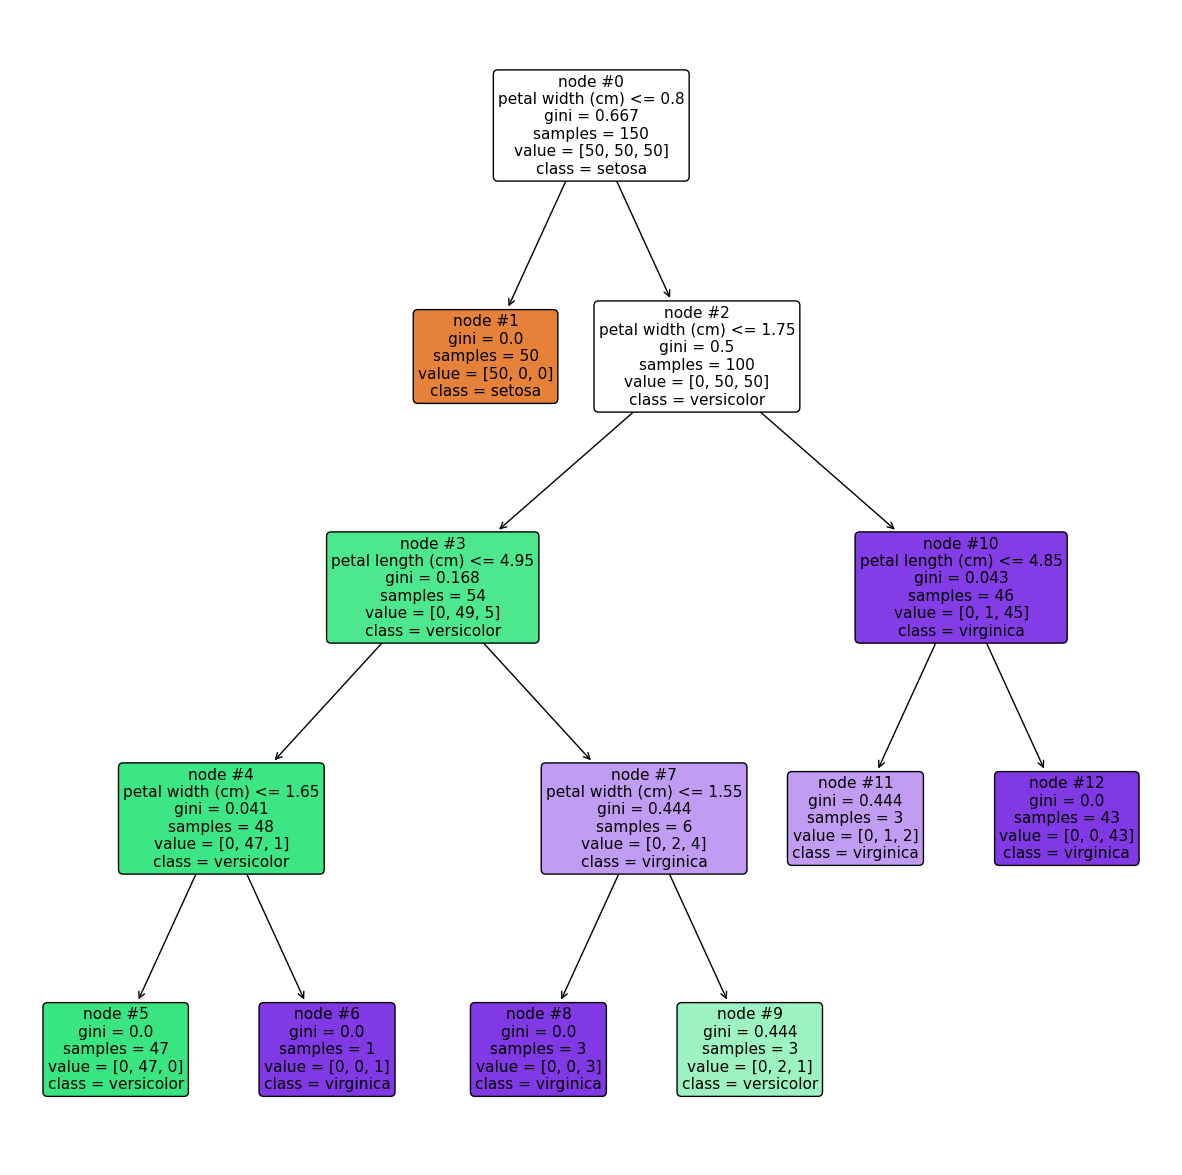

In [9]:
tree_best = final_dict['DecisionTree']['best_model']
tree_best.fit(data_dict['x'], data_dict['y'])

tree_plotter(tree_best, iris.feature_names, iris.target_names)


In the new model, there is a notable change in the positioning of petal width and petal length. Petal width emerges as the most influential classifier, taking on the role of both the root of the decision tree and repeating three times throughout the tree. This indicates its strong discriminatory power in the flower classification.

Conversely, sepal length and sepal width appear to be weak classifiers, as they do not contribute significantly to the flower classification. This is evident from the absence of branches that split the samples based on these features. The depth of this tree is one less than the previous model, resulting in a tree with a depth of four.

The new decision tree demonstrates less complexity compared to the previous one, as it has fewer layers and fewer classifiers involved. Despite having two impure leaves, the model achieves effective classification with reduced complexity.

To finish this part, pruning will be implemented. Pruning is a technique used to reduce the complexity of a decision tree by removing some of its branches or nodes. It helps prevent overfitting and improves the generalization of the model. There are different methods to implement pruning in decision trees, but one of the most commonly used approaches is Cost Complexity Pruning, also known as Minimal Cost Complexity Pruning or simply CCP.

The parameter that should be tuned in this case is effective alpha. Effective alphas, also known as equivalent alphas or pruning alphas, are the set of complexity parameters associated with different subtrees of a decision tree during the pruning process. In Cost Complexity Pruning, the idea is to evaluate the performance of each subtree at different effective alphas and choose the optimal alpha that achieves the best trade-off between accuracy and simplicity. The optimal alpha is often the one that results in the most parsimonious tree that still captures most of the classification performance on the validation data. This helps prevent overfitting, as overly complex trees can memorize noise in the training data and perform poorly on unseen data.The complexity parameter is used to define the cost-complexity measure, $R_α(T)$ of a given tree T: 

$$
R_α(T)=R(T)+α|T|
$$

where |T| is the number of terminal nodes in T and R(T) is traditionally defined as the total misclassification rate of the terminal nodes. 

[<a href="https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/" target="_blank">link</a>]  [<a href="https://en.wikipedia.org/wiki/Decision_tree_pruning" target="_blank">wiki</a>] [<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html" target="_blank">sklearn</a>]

There are several approaches to implement pruning in decision trees. One simple method involves dividing the dataset into train and test subsets and examining the effect of pruning on model accuracy. This approach can be useful for educational purposes to demonstrate how pruning impacts the model's outcome. However, for a more practical and precise approach, Cross-validation or GridSearchCV can be employed, both of which I will discuss here.

The first method's drawback lies in its limited accuracy compared to the other two. Cross-validation and GridSearchCV divide the data into multiple subsets (e.g., five subsets in 5-fold cross-validation) and utilize each subset as test data once. This allows the methods to fine-tune model parameters effectively across multiple test datasets. In contrast, the first approach uses only one test dataset for evaluating the model's performance. As a result, particularly with large datasets, it cannot yield the same level of precision as the two other methods.

Consequently, to begin with, the Iris dataset is divided into train and test datasets.

In [208]:
X, y = iris.data, iris.target

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# make the model and fit it
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Check the performance of the model
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# evaluate the accuracy of the model for these two datasets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(
    f'Train data accuracy: {round(train_acc, 2)}\nTest data accuracy: {round(test_acc, 2)}')


Train data accuracy: 1.0
Test data accuracy: 0.89


**Note**: The accuracy of the model on the test data can vary. The reason is that each time, by running this piece of code, one can have different test data due to the random nature of this process. So, if you want to re-run the program and see the effect of pruning be sure that you get less accuracy for test data in comparison with traning data.

The accuracy of the model decreases when is used on the test data. This shows the problem of overfitting. To tackle this problem, pruning can be used as follows. 

In [209]:
# implement CCP
path = dt.cost_complexity_pruning_path(x_train, y_train)

# extract alpha values and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [210]:
ccp_alphas


array([0.        , 0.00920635, 0.01843318, 0.03351487, 0.22956366,
       0.36003023])

In [211]:
impurities


array([0.        , 0.0184127 , 0.03684588, 0.07036075, 0.29992441,
       0.65995465])

The small range of CCP-alpha values is a reflection of the tree's simplicity, and with deeper and more complex decision trees, a wider range of alpha values would typically be encountered. Nonetheless, even with the limited alpha values, the pruning process still enables us to assess different levels of tree complexity and their impact on the model's performance and generalization.
 
 To continue, different plots can be sketched to show the effect of the pruning. First, impurity/ccp-alpha plot will be sketched. 

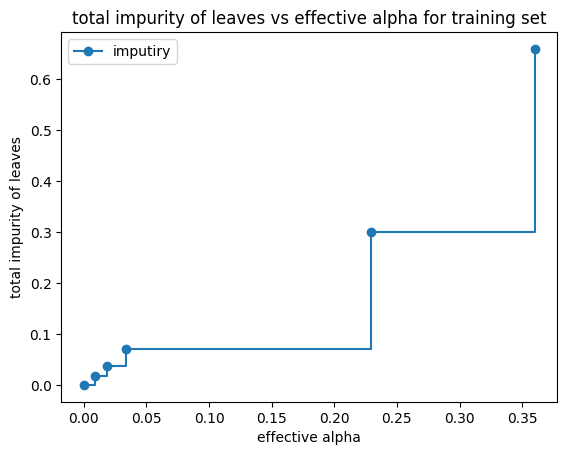

In [212]:
def feature_alpha_plot(ccp_alphas, feature_dict, y_label):
    # I make this function Based on the sklearn code.
    fig, ax = plt.subplots()

    for feature_name in feature_dict:
        ax.plot(ccp_alphas, feature_dict[feature_name],
                marker="o", drawstyle="steps-post", label=feature_name)

    ax.set_xlabel('effective alpha')
    ax.set_ylabel(y_label)
    ax.set_title(f'{y_label} vs effective alpha for training set')
    plt.legend()
    plt.show()


feature_dict = {'imputiry': impurities}
feature_alpha_plot(ccp_alphas, feature_dict,
                   y_label='total impurity of leaves')


As observed, increasing the alpha value leads to a rise in the total impurity within the leaves, effectively reducing the variance. However, it is essential to exercise caution when applying pruning since excessive pruning may result in a loss of accuracy. Striking the right balance is critical to maintaining optimal model performance.

To proceed, we will generate various models based on different pruning levels, and subsequently assess different characteristics of these models. This evaluation process will aid us in identifying the most effective pruning technique for our specific dataset and problem. By carefully selecting the appropriate pruning level, we can achieve a well-generalized and accurate decision tree model.

In [213]:
def making_trees(x_train, y_train, ccp_alphas):
    # Make a list of Decision trees based on different ccp_alpha values
    dt_list = [tree.DecisionTreeClassifier(ccp_alpha=alpha).fit(x_train, y_train)
               for alpha in ccp_alphas]
    return dt_list


def extracting_features_dt(dt_list, feature, x_data='', y_category=''):

    if re.search('accuracy.*', feature):
        # make a list of accuracies
        feature_list = [accuracy_score(
            y_category, dt.predict(x_data)) for dt in dt_list]

    else:
        # make a list of different features such as number of nodes ormax depth
        feature_list = [getattr(dt.tree_, feature) for dt in dt_list]

    return feature_list


In [214]:
# make a list of decision trees
dt_list = making_trees(x_train, y_train, ccp_alphas)


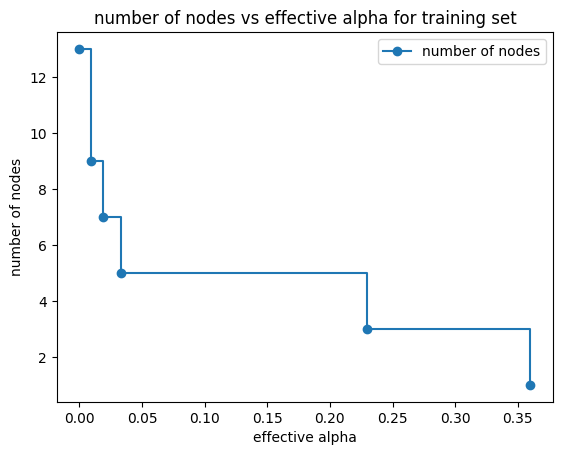

In [215]:
# extract and plot number of nodes
node_counts = extracting_features_dt(dt_list, 'node_count')

feature_dict = {'number of nodes': node_counts}
feature_alpha_plot(ccp_alphas, feature_dict, y_label='number of nodes')


This curve illustrates that as the effective alpha increases, the number of nodes in the decision tree decreases. As a result, the decision tree's complexity diminishes with the rise of this parameter. Also, we can investigate the depth (number of layer) of the tree.

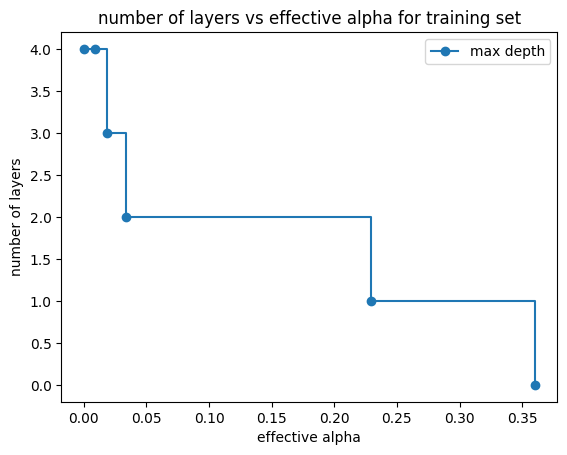

In [216]:
# extract and plot number of nodes
max_depth = extracting_features_dt(dt_list, 'max_depth')

feature_dict = {'max depth': max_depth}
feature_alpha_plot(ccp_alphas, feature_dict, y_label='number of layers')


By increasing the effective alpha, the number of layers in the decision tree reduces, leading to a decrease in its overall complexity. However, it is worth noting that in some cases, increasing alpha may not affect the number of layers (depth) but still result in a continuous reduction in the tree's complexity, primarily due to a decrease in the number of nodes. for the last plot one can compare the accuracy of the the models with different alpha predicting the training and testing datasets.

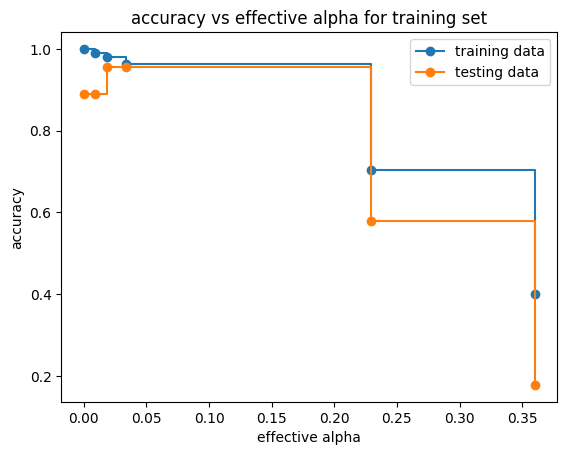

In [217]:
y_train_predict = extracting_features_dt(
    dt_list, 'accuracy', x_data=x_train, y_category=y_train)
y_test_predict = extracting_features_dt(
    dt_list, 'accuracy', x_data=x_test, y_category=y_test)

feature_dict = {'training data': y_train_predict,
                'testing data': y_test_predict}
feature_alpha_plot(ccp_alphas, feature_dict, y_label='accuracy')


This plot demonstrates that as the magnitude of alpha increases (resulting in decreased complexity), the accuracy of the models starts to decrease after reaching a certain range (between 0.0184127 and 0.25961451). However, within this specific range, the accuracy for both training and testing data remains approximately equal (train_data: 0.96, test_data: 0.955). This indicates that the model achieves its optimal performance, as it exhibits a low level of variance and effectively addresses the issue of overfitting. The range between these alpha values represents the sweet spot where the model strikes the right balance between complexity and generalization, leading to its best performance on unseen data. So, the best model is as follows.

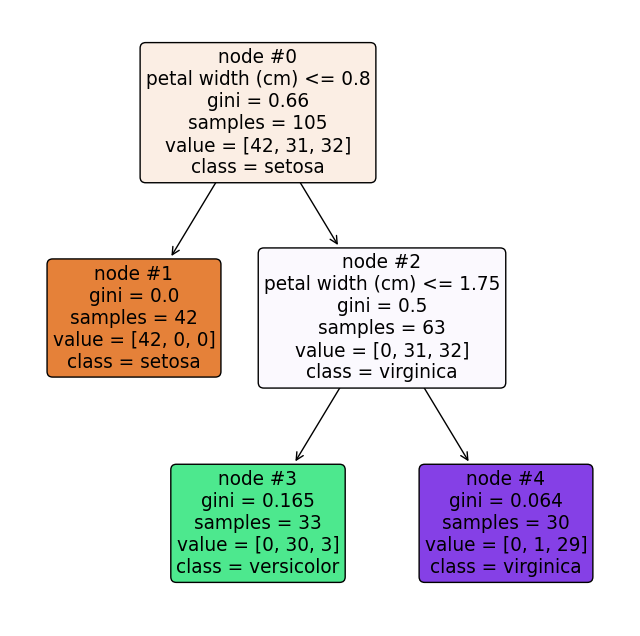

In [218]:
best_model = dt_list[3]

tree_plotter(best_model, iris.feature_names,
             iris.target_names, fig_size=(8, 8))


This tree is considered the best when the dataset is divided into training and testing subsets. It consists of three layers, with petal width being the dominant classifier. In fact, the only variable featured in this tree is petal width. This suggests that the entire dataset can be adequately described by analyzing the petal width values of the flowers alone.

To continue one can use Cross-validation or ridSearchCV methods to implement pruning on the entire dataset. Here I implement GridSearchCV since it contains Cross-validation as its internal evaluation method, but one can use Cross-validation method directly. For more information about this method one can have a look at Fift_Assignment folder E_LR_SVM.ipynb file. We can use a range of numbers as we can use for other parameters. Another way is to calculate the CCP-alphas first and then use this list as the input of the GridSearchCV.

In [219]:
# Calculate the list of CCP-alphas
# make the decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(iris.data, iris.target)

# calculate the list of CCP-alphas
path = dt.cost_complexity_pruning_path(iris.data, iris.target)
ccp_alphas = path.ccp_alphas


In [220]:
# make parameter dictionary for decision tree
dt_param = {
    'ccp_alpha': ccp_alphas
}

# Scoring list
scoring_list = ['f1_macro', 'recall_macro', 'roc_auc_ovo', 'accuracy']
# Make estimator dictionary
estimator_dict = {'DecisionTree': [tree.DecisionTreeClassifier(), dt_param]}

# Make data dictionary
data_dict = {'x': iris.data,
             'y': iris.target}

final_dict = multiple_grid_search(
    estimator_dict, scoring_list, 5, 'accuracy', data_dict)


DecisionTree
time:0.3789846897125244


In [221]:
# The best mode is
final_dict


{'DecisionTree': {'best_model': DecisionTreeClassifier(ccp_alpha=0.013055555555555572),
  'best_parameters': {'ccp_alpha': 0.013055555555555572},
  'best_score': 0.9733333333333334}}

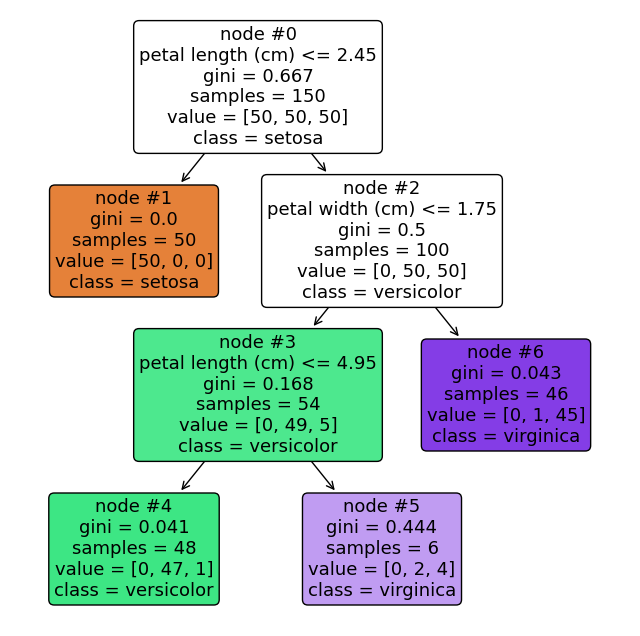

In [222]:
# sketch the best model
tree_best = final_dict['DecisionTree']['best_model']
tree_best.fit(data_dict['x'], data_dict['y'])

tree_plotter(tree_best, iris.feature_names, iris.target_names, fig_size=(8, 8))


By encountering all the dataset, the accuracy increases a little bit. Also, one can use this parameter among with other parameter in GridSearchCV to get a better result. 

In [223]:
# make parameter dictionary for decision tree
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0, 1, 4],
    'ccp_alpha': ccp_alphas
}

# Scoring list
scoring_list = ['f1_macro', 'recall_macro', 'roc_auc_ovo', 'accuracy']
# Make estimator dictionary
estimator_dict = {'DecisionTree': [tree.DecisionTreeClassifier(), dt_param]}

# Make data dictionary
data_dict = {'x': iris.data,
             'y': iris.target}

final_dict = multiple_grid_search(
    estimator_dict, scoring_list, 5, 'accuracy', data_dict)


DecisionTree
time:58.12729501724243


In [224]:
final_dict

{'DecisionTree': {'best_model': DecisionTreeClassifier(ccp_alpha=0.008888888888888889, max_depth=5,
                         min_impurity_decrease=0, min_samples_split=10),
  'best_parameters': {'ccp_alpha': 0.008888888888888889,
   'criterion': 'gini',
   'max_depth': 5,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 1,
   'min_samples_split': 10},
  'best_score': 0.9733333333333334}}

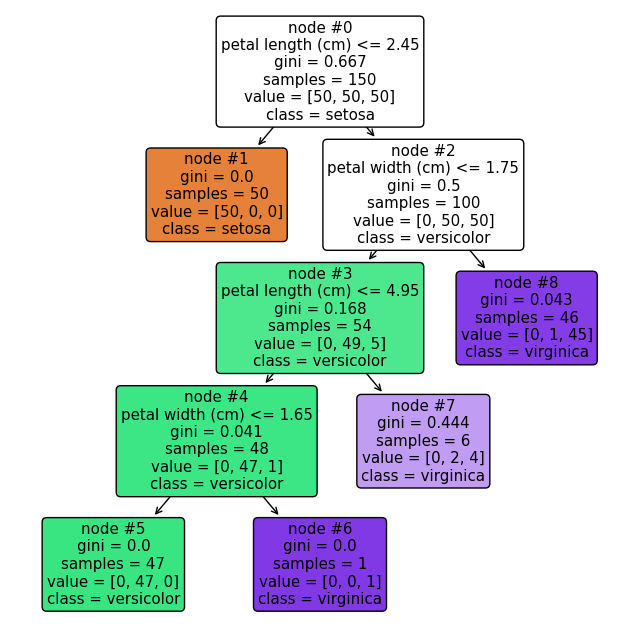

In [225]:
tree_best = final_dict['DecisionTree']['best_model']
tree_best.fit(data_dict['x'], data_dict['y'])

tree_plotter(tree_best, iris.feature_names, iris.target_names, fig_size=(8, 8))


by using all the parameters the accuracy increases by about 0.5 percent and reach to 97.1% which is a quite reasonable amount. Consequently, the best way to optimize the model is by tunning all the parameters using GridSearchCV.

# Naive bayes
A Naive Bayes classifier is a powerful probabilistic machine learning model designed for classification tasks. It operates on the foundation of the Bayes theorem, which allows it to make informed predictions with high efficiency and accuracy. 

$$
P(A|B) = \frac{P(B|A).P(A)}{P(B)}
$$

By employing Bayes theorem, we can calculate the probability of event A occurring, given that event B has already taken place. In this context, event B serves as the evidence, while event A represents the hypothesis. The underlying assumption in this approach is that the predictors or features are independent of each other, meaning the presence of one particular feature does not influence the others. Consequently, this method is referred to as "naive". Another assumption made here is that all the predictors have an equal effect on the outcome.

Naive Bayes algorithms find extensive applications in sentiment analysis, spam filtering, recommendation systems, and more. They are favored for their speed and straightforward implementation. However, their major drawback lies in the assumption that predictors must be independent. In many real-life scenarios, predictors are actually dependent, which can hinder the classifier's performance.

Advantages:
- Tends to work really well in real-world situations.
- Can be very fast.
- Requires a small amount of training data.
- If the dataset does not fit into memory, some types can use the `partial_fit` method.

Disadvantages:
- Although it is a decent classifier, it is known as a bad estimator. Therefore the probabilities from `predict_proba` are not used normally.

Types of classifiers offered by scikit-learn:

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$:

- `GaussianNB` uses the Gaussian Naive Bayes algorithm for classification. It assumes that the likelihood of the features is Gaussian. When dealing with predictors that have continuous values, as opposed to discrete ones, it is assumed that these values follow a Gaussian distribution. Since the way the values are present in the dataset changes, the formula for conditional probability changes to

$$
P(x_i|y) = \frac{1}{\sqrt(2\pi\sigma_y^2)} . \exp(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})
$$

- `MultinomialNB` is used for multinomially distributed dataThis method is primarily applied to document classification problems, where the goal is to determine whether a document belongs to a specific category, such as sports, politics, technology, and so on. The classifier relies on features or predictors derived from the word frequencies present in the document. This method is used with discrete features.

The distribution is parametrized by vectors $\theta_y = {( \theta_{y1}, ..., \theta_{yn})}$ for each class y, where n is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability of $P(x_i|y)$ feature appearing in a sample belonging to class y.

The parameters $\theta_{y}$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$$
P(x_i|y) = \theta_{yi} = \frac{N_{yi} + \alpha}{N_{y} + n\alpha}
$$

where $N_{yi}$ is the number of times feature i appears in a sample of class y in the training set T, and $N_{y}$ is the total count of all features for class y.

The smoothing priors $\alpha >= 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$ is called Lidstone smoothing.

- `ComplementNB` Complement Naive Bayes (CNB), an adaptation of the standard Multinomial Naive Bayes (MNB) algorithm, is designed to address imbalanced data sets effectively. It achieves this by utilizing statistics from the complement of each class to compute the model's weights. Empirical evidence demonstrates that CNB's parameter estimates are notably more stable than MNB's. Moreover, in text classification tasks, CNB consistently outperforms MNB, often by a significant margin. for the formalisation please have a look at the following link. <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>.

- `BernoulliNB` assumes that data is distributed according to multivariate Bernoulli distributions. Thus, it requires binary-valued variables. This approach is akin to Multinomial Naive Bayes, but with the distinction that the predictors are represented as boolean variables. The parameters used to predict the class variable can only take on two values: "yes" or "no." For instance, it determines whether a word occurs in the text or not. This class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter). The decision rule for Bernoulli naive Bayes is based on

$$
P(x_i|y) = P(x_i=1|y)x_i +(1 - P(x_i=1|y))(1-x_i)
$$

which differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of a feature i that is an indicator for class y, where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

- `CategoricalNB` implements naive Bayes for categorically distributed data. It assumes that each feature has its own categorical distribution. For more information please have a look at <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>

Naive Bayes models can be used to tackle large scale classification problems for which the full training set might not fit in memory. To handle this case, MultinomialNB, BernoulliNB, and GaussianNB expose a partial_fit method that can be used incrementally as done with other classifiers as demonstrated in Out-of-core classification of text documents. All naive Bayes classifiers support sample weighting. <a href="https://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py" target="_blank">link</a>

**Note**: The partial_fit method call of naive Bayes models introduces some computational overhead. It is recommended to use data chunk sizes that are as large as possible, that is as the available RAM allows. 

For an extensive description, make sure to read the <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>, <a href="https://www.ibm.com/topics/naive-bayes" target="_blank">docs</a>, and <a href="https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c" target="_blank">docs</a>.

To continue this educational notebook, I will implement Naive Bayes technique on the Iris dataset. the mentioned dataset contains features that have continuous values; consequently, the best technique that can be used for classification for this specific dataset is **GaussianNB**. To implement this technique, first I will use train_test_split function like this <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">link</a>, then I will use Cross-validation method to get the best model in terms of accuracy.

**Note**: Gaussian Naive Bayes method does not have any hyperparameters to tune. Actually,  It is a simple probabilistic classifier that assumes continuous features are normally distributed within each class, but it does not involve any adjustable parameters or tuning.

In [236]:
X, y = iris.data, iris.target

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Make the model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# predict
y_train_predict = gnb.predict(x_train)
y_test_predict = gnb.predict(x_test)

# evaluate the accuracy of the model for these two datasets
train_acc = accuracy_score(y_train, y_train_predict)
test_acc = accuracy_score(y_test, y_test_predict)

print(
    f'Train data accuracy: {round(train_acc, 2)}\nTest data accuracy: {round(test_acc, 2)}')


Train data accuracy: 0.97
Test data accuracy: 0.96


As it can be seen the accuracies of the model both on the training data and testing data are roughly equal. if one run this program a couple of times, they can see that sometimes the accuracy of testing data is even more that training data that shows the reliability and precision of this model in classifying the data points. To continue, I will use Cross-validation to find the best model. There are two ways to implement Cross-validation. one is by utilizing GridSearchCV and assigning no parameter for evaluation (gnb_param = {}), or directly using cross_validation function from sklearn library. I will implement both of them here.

In [271]:
# make an empty parameter dictionary for Gaussian Naive Bayes
gnb_param = {}

# Scoring list
scoring_list = ['f1_macro', 'recall_macro', 'roc_auc_ovo', 'accuracy']

# Make estimator dictionary
estimator_dict = {'GaussianNB': [GaussianNB(), gnb_param]}

# Make data dictionary
data_dict = {'x': iris.data,
             'y': iris.target}

final_dict = multiple_grid_search(
    estimator_dict, scoring_list, 5, 'accuracy', data_dict)


GaussianNB
time:0.05984044075012207


In [272]:
final_dict


{'GaussianNB': {'best_model': GaussianNB(),
  'best_parameters': {},
  'best_score': 0.9533333333333334}}

the best method based on Cross-validation method has the accuracy = 0.9533. Also, we can use the actual cross-validation function.

In [273]:
scores = cross_validate(GaussianNB(), iris.data,
                        iris.target, cv=5, scoring=scoring_list)

print(f'linear dataset:')
for key in scores:
    print(f'{key}: {scores[key].mean()}')


linear dataset:
fit_time: 0.0011966705322265625
score_time: 0.010372209548950195
test_f1_macro: 0.9530472646262119
test_recall_macro: 0.9533333333333331
test_roc_auc_ovo: 0.9933333333333334
test_accuracy: 0.9533333333333334


For the last part of this educational notebook, the outcome of the methods on two random dataset will be compared, and a function will be made based on the available code in <a href="https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_DT_NB.ipynb" target="_blank">repository</a>.

# Comparing decisions
Here our teacher used make moon and circle datasets to compare the performance of these two methods. Both of these datasets are random continous datasets.

In [29]:
# determine datasets and models
datasets = [make_moons(), make_circles()]
names = ['Decision Tree', 'Naive Bayes']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB()]


In this approach our teacher used train_test_split function to randomly divide the dataset into test and train datasets.

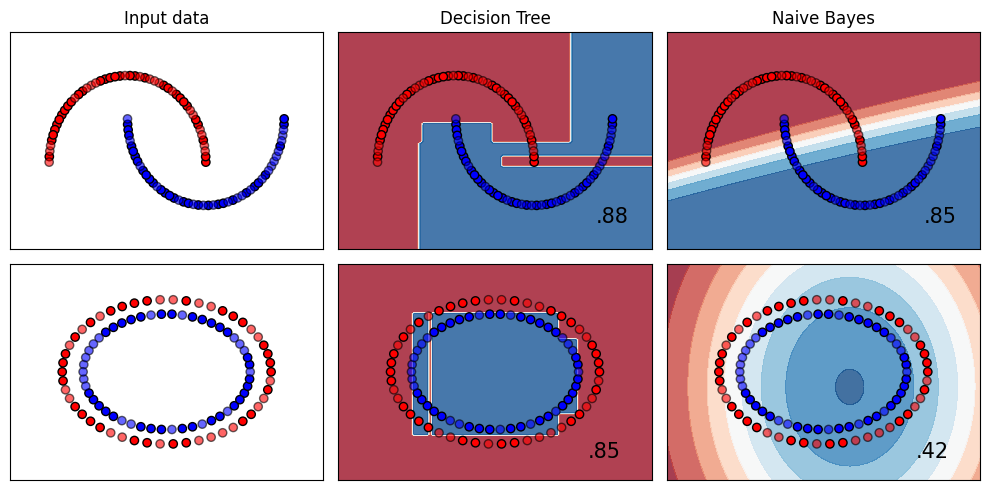

In [30]:
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )

    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    # plot original
    if ds_count == 0:
        ax.set_title('Input data')

    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors='k')

    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
               cmap=cm_bright, alpha=0.6, edgecolors="k")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:,
                                   1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()


I will use GridSearchCV to make more efficient models.

In [352]:
def param_dict_maker(estimator, ds):

    # if the estimator is GaussianNB + polynomial return empty dictionary
    if estimator == 'GaussianNB_poly':
        param_dict = {'polynomial__degree': np.arange(2,10,1)}
    
    # if the estimator is GaussianNB + standard scaler return empty dictionary
    elif estimator == 'GaussianNB_scaler':
        param_dict = {}

    # if estimator is Decision Tree calculate CCP-alphas and return parameter dictionary
    elif estimator == 'DecisionTree':
        dt = tree.DecisionTreeClassifier()
        dt.fit(ds[0], ds[1])

        # calculate the list of CCP-alphas
        path = dt.cost_complexity_pruning_path(ds[0], ds[1])
        ccp_alphas = path.ccp_alphas
        param_dict = {
            'DecisionTree__criterion': ['gini', 'entropy'],
            'DecisionTree__max_depth': [None, 5, 10, 15],
            'DecisionTree__min_samples_split': [2, 5, 10],
            'DecisionTree__min_samples_leaf': [1, 2, 4],
            'DecisionTree__min_impurity_decrease': [0, 1, 4],
            'DecisionTree__ccp_alpha': ccp_alphas
        }

    return param_dict


In [353]:
def comparing_plot_maker(datasets, estimator_dict, scoring_list, refit_method):

    # iterate over datasets
    for ds_count, ds in enumerate(datasets.keys()):

        figure = plt.figure(figsize=(15, 5))
        i = 1
        X, y = datasets[ds]
        # determining min point and max point and add margin
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        # Add a main title for each dataset
        plt.suptitle(f"Dataset {ds}")

        # make the best models based on GridSearchCV
        for estimator in estimator_dict:
            #print(estimator_dict[estimator])
            estimator_dict[estimator].append(param_dict_maker(estimator, datasets[ds]))

        # Make data dictionary
        data_dict = {'x': datasets[ds][0],
                     'y': datasets[ds][1]}

        # find the best models
        final_dict = multiple_grid_search(
            estimator_dict, scoring_list, 5, refit_method, data_dict)
        
        # plot dataset
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(final_dict.keys()) + 1, i)

        # plot original
        
        ax.set_title('Input data')

        # plot data points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        i += 1

        # iterate over classifiers
        for model in enumerate(final_dict):
            
            ax = plt.subplot(len(datasets), len(final_dict.keys()) + 1, i)

            # make pipeline to make it easier
            clf = final_dict[model[1]]['best_model']
            clf.fit(datasets[ds][0], datasets[ds][1])
            score = final_dict[model[1]]['best_score']

            # make the boundaries and contours
            DecisionBoundaryDisplay.from_estimator(
                clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )

            # plot data points
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
            
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())

            
            ax.set_title(model[1])
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
    plt.show()


GaussianNB_poly
time:0.2922084331512451
GaussianNB_scaler
time:0.03391885757446289
DecisionTree
time:43.29834985733032
GaussianNB_poly
time:0.23041224479675293
GaussianNB_scaler
time:0.030889034271240234
DecisionTree
time:40.92322850227356


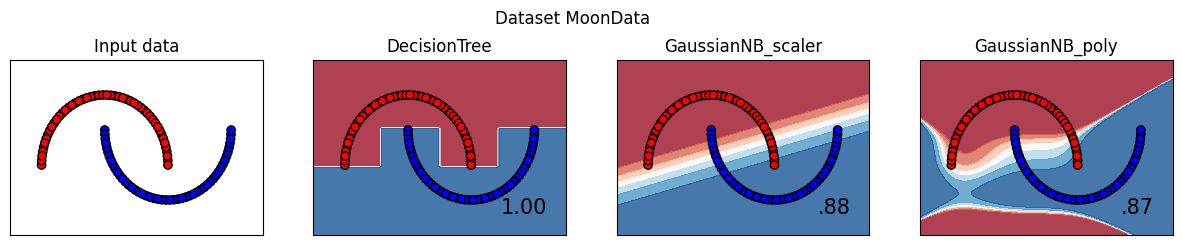

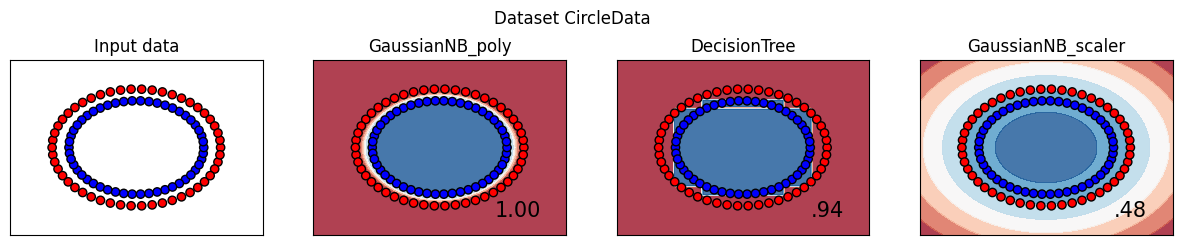

In [355]:
from collections import OrderedDict
# Scoring list
scoring_list = ['f1_macro', 'recall_macro', 'roc_auc_ovo', 'accuracy']

# Create a pipeline with StandardScaler and GaussianNB
GaussianNB_poly_pipeline = Pipeline([('polynomial', PolynomialFeatures()),
                                ('GaussianNB', GaussianNB())])

DecisionTree_pipeline = Pipeline([('StandardScaler', StandardScaler()),
                                  ('DecisionTree', tree.DecisionTreeClassifier())])

GaussianNB_scaler_pipeline = Pipeline([('StandardScaler', StandardScaler()),
                                ('GaussianNB', GaussianNB())])
# Make estimator dictionary
estimator_dict = OrderedDict({'GaussianNB_poly': [GaussianNB_poly_pipeline],
                  'GaussianNB_scaler': [GaussianNB_scaler_pipeline],
                  'DecisionTree': [DecisionTree_pipeline]})

datasets = {'MoonData': make_moons(), 
            'CircleData': make_circles()}

comparing_plot_maker(datasets, estimator_dict, scoring_list, 'accuracy')


In this updated version, we evaluated the performance of three classifiers: Decision Tree, GaussianNB with polynomial kernel, and GaussianNB with z-score normalization. We used these classifiers to analyze the Moon and Circle datasets.

For the Moon dataset, the Decision Tree classifier achieved an outstanding 100% accuracy. It's important to note that this high accuracy is not indicative of overfitting, as it resulted from the Cross-validation method. This result showcases the remarkable adaptability of Decision Trees to handle intricate data shapes. Consequently, Decision Trees can be a reliable and effective method for describing complex datasets.

Interestingly, we observed that GaussianNB with z-score normalization outperformed the GaussianNB with a polynomial kernel as the preprocessing step in describing this dataset. This suggests that sometimes a simple model can perform as accurately as a more complex one. Therefore, the best approach for finding the optimal model is to experiment with various classifiers and assess their compatibility with the dataset.

In the case of the Circle dataset, GaussianNB with Polynomial kernel demonstrates exceptional performance, achieving 100% accuracy. It stands out as the most reliable model to effectively describe this dataset. However, Decision Tree also proves to be a strong contender with an accuracy of 94%, highlighting its high precision and adaptability for this dataset.

On the other hand, GaussianNB with z-score normalization fails to capture the underlying pattern of the dataset and yields unsatisfactory predictions. Even in the analyzed run, the accuracy of this model is less than half, indicating that it performs worse than random chance. This observation emphasizes that the success of GaussianNB heavily relies on the choice of preprocessing steps. Consequently, selecting the most suitable preprocessing technique is crucial to achieving optimal outcomes with this method.

**Conclusion**:
- Classifiers can have unique assumptions that are great for certain datasets and less great for others.